In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 315
K = 100
T = 1
L = np.pi / 2
x = np.linspace(0, L, N)
t = np.linspace(0, T, K)

In [3]:
def read_txt_file(filename):
    with open(filename, 'r') as f:
        matrix = [list(map(float, line.split())) for line in f]
    return matrix

analytical_solution = read_txt_file("analytical_solution.txt")
crank_nicolson = read_txt_file("crank_nicolson.txt")
explicit_finite_difference_method = read_txt_file("explicit_finite_difference_method.txt")
implicit_finite_difference_method = read_txt_file("implicit_finite_difference_method.txt")

solutions = {
    'analytical_solution': analytical_solution,
    'crank_nicolson': crank_nicolson,
    'explicit_finite_difference_method': explicit_finite_difference_method ,
    'implicit_finite_difference_method': implicit_finite_difference_method
}


In [4]:
def max_abs_error(A, B):
    return abs(A - B).max()

In [5]:
def plot_solutions(solutions, time, x, t):
    t_id = abs(t - time).argmin()
    plt.figure(figsize=(16, 9))
    for method_name, solution in solutions.items():
        plt.plot(x, solution[t_id], label=method_name)
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
def plot_errors(solutions, t):
    plt.figure(figsize=(16, 9))
    for method_name, solution in solutions.items():
        errors_array = np.array([
            max_abs_error(np.array(solution[i]), np.array(solutions['analytical_solution'][i]))
            for i in range(len(t))
        ])
        plt.plot(t, errors_array, label=method_name)

    plt.xlabel('time')
    plt.ylabel('Max abs error')

    plt.legend()
    plt.grid()
    plt.show()

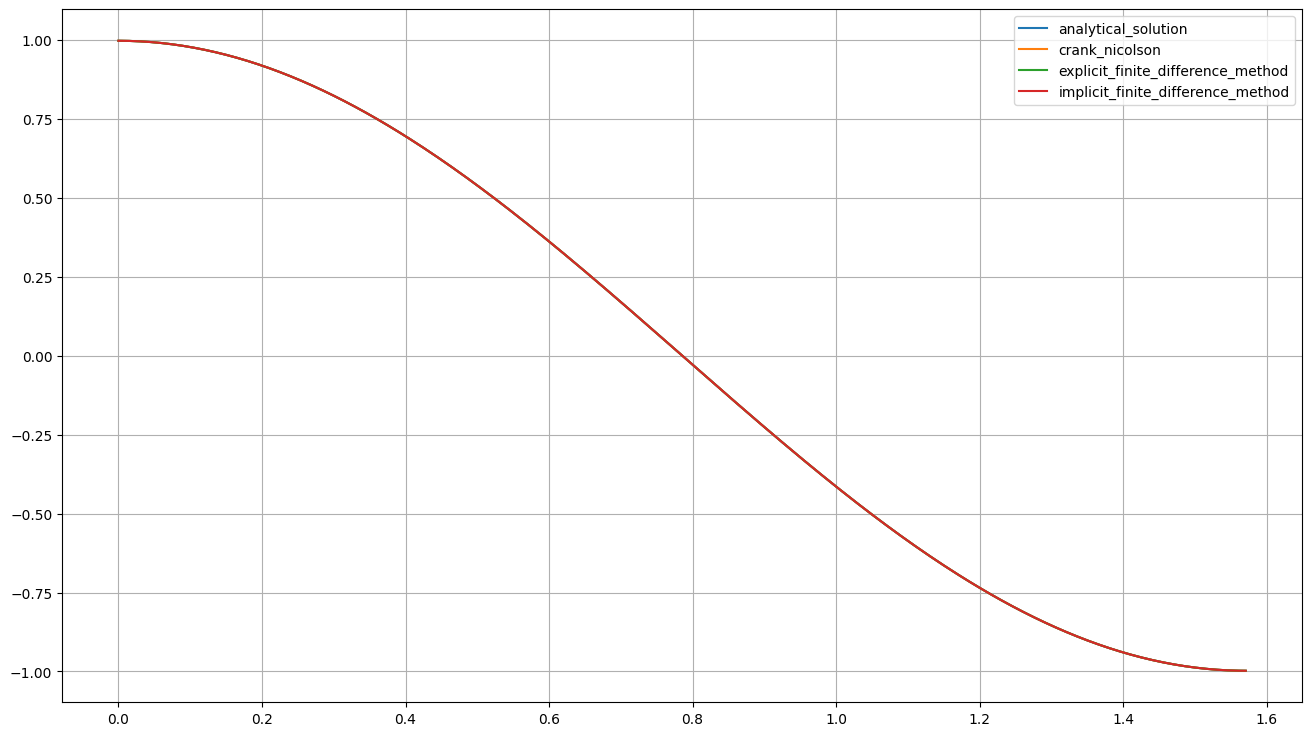

In [7]:
plot_solutions(solutions, 0.5, x, t)

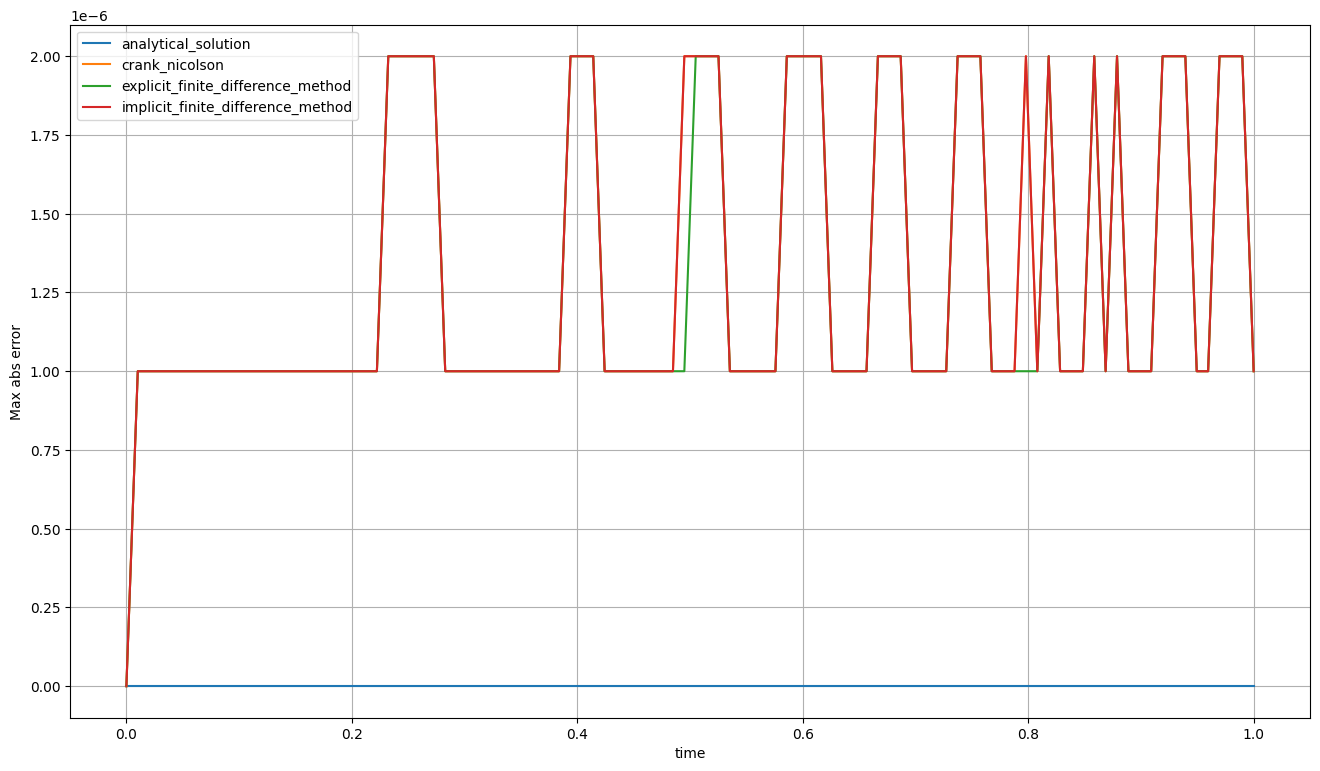

In [8]:
plot_errors(solutions, t)